In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def square(amp,offset,period,density,start,end):
    length = (end-start)*density
    y = np.zeros(length,float)
    y.fill(offset)
    for x in range(length):
        x -= start
        if (x/density)%period < period/2:
            y[x] += amp
        else:
            y[x] -= amp
    x = np.linspace(start,end,(end-start)*density)
    return x,y

def sin(x,amp,period,phase,offset):
    return amp*np.sin(2*np.pi/period*x-phase)+offset

def integrate(x,y):
    length = len(x)-1
    total = 0
    for i in range(length):
        total += (x[i+1]-x[i]) * (y[i]+y[i+1])
    return total/2

#the coeffcients are not normalised so only the ralative values matter
def fourier(y,max_term=np.Inf):
    length = min(len(y),max_term)
    x = np.linspace(0,len(y),len(y))
    an = [sum(y)]
    bn = [0]
    for a in range(1,int(length/2)):
        an.append(np.dot(y,np.cos(2*np.pi/len(y)*a*x)))
    for b in range(1,int(length/2)):
        bn.append(np.dot(y,np.sin(2*np.pi/len(y)*b*x))) 
    return an,bn

Text(0, 0.5, 'temperature(°C)')

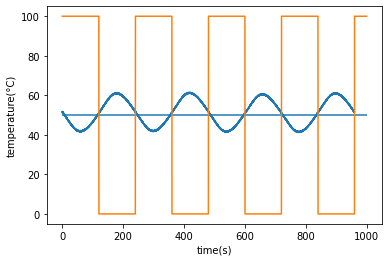

In [17]:
x1, y1 = np.loadtxt("thermal_4min_a.txt", unpack=True, skiprows=3)
plt.plot(x1/10,y1)

x2, y2 = square(50,50,240,100,0,1000)
plt.plot(x2,y2)

plt.hlines(50,0,1000)

para = curve_fit(sin,x1,y1,p0=[10,2400,np.pi,50])
#plt.plot(x1/10,sin(x1,*para[0]))
plt.xlabel("time(s)")
plt.ylabel("temperature(°C)")

In [11]:
x1, y1 = np.loadtxt("thermal_4min_a.txt", unpack=True, skiprows=3)
an,bn = fourier(y1)

an = np.array(an)
bn = np.array(bn)

[0.00000000e+00 1.00010418e+00 2.00020836e+00 ... 9.59799979e+03
 9.59899990e+03 9.60000000e+03]


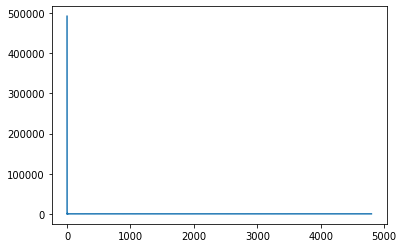

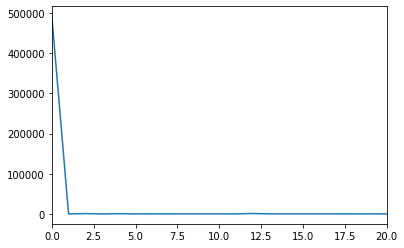

In [12]:
plt.plot(an)
plt.show()

plt.xlim(0,20)
plt.plot(an)

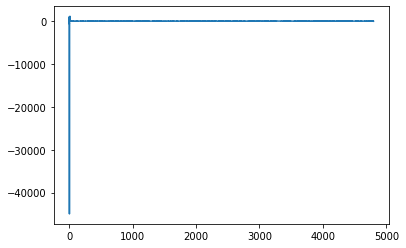

(0.0, 20.0)

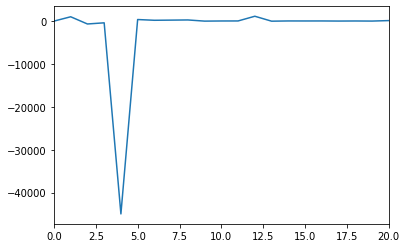

In [13]:
plt.plot(bn)
plt.show()

plt.plot(bn)
plt.xlim(0,20)



[ 1.57079633 -0.08176399  2.34779572 -2.82310473  3.13029693 -0.05576802
  0.5073418   0.28745517 -0.0143613   1.7257088 ]


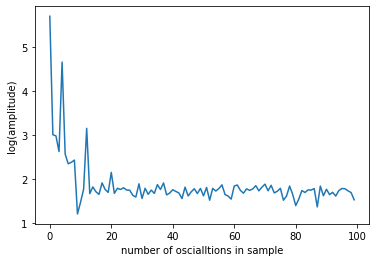

In [16]:
num = 100

magnitude = np.sqrt(an[:num]**2+bn[:num]**2)
plt.plot(np.log10(magnitude))
plt.ylabel("log(amplitude)")
plt.xlabel("number of oscialltions in sample")

phase = np.arctan2(an[:num],bn[:num])
print(phase[:10])



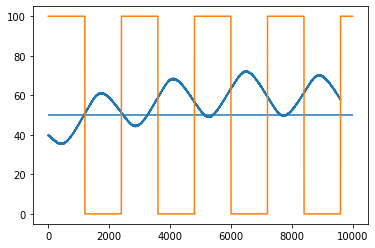

In [15]:
x1, y1 = np.loadtxt("thermal_4min_b.txt", unpack=True, skiprows=3)
plt.plot(x1,y1)

x2, y2 = square(50,50,2400,100,0,10000)
plt.plot(x2,y2)

plt.hlines(50,0,10000)